In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import smogn
import seaborn as sns

### This is our preprocessed dataset (Data-at-admission) from PhyAdRsnComorbMed.xlsx

In [25]:
## originial datset (new.csv)

hospital = pd.read_csv("../Generating Data/new.csv")
hospital = hospital.drop(["Unnamed: 0","id"],axis=1)
hospital

,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,21,74,1,166.911029,80.265922,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,61,0,154.900000,73.600000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,58,0,166.911029,80.265922,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,94,1,182.800000,66.200000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,91,1,166.911029,80.265922,1.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2,56,0,165.000000,72.600000,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
502,13,74,0,166.911029,55.000000,0.0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
503,19,81,1,158.000000,65.000000,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,9,74,1,166.911029,81.700000,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
# hospital['long_term'] = hospital['hospital_length_of_stay'].apply(lambda x: 0 if x > 29 else 1)

### Applying SMOGN

In [26]:
## hospital_smogn consists of the new synthetic datapoints and the old data points

hospital_smogn = smogn.smoter(data = hospital, y = 'hospital_length_of_stay', k = 22,)

r_index: 100%|#################################| 72/72 [00:00<00:00, 101.52it/s]
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/smogn/over_sampling.py:446: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_new.insert(
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/smogn/over_sampling.py:446: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_new.insert(
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/smogn/over_sampling.py:446: PerformanceWarning: DataFrame is highly fragmented.

In [27]:
print(hospital.shape)
hospital_smogn.shape

(506, 746)


(416, 746)

In [28]:
## Hospital_merge consists of the all the new sytnethic points

hospital_merge = hospital_smogn.merge(hospital, how='left', indicator = True)

hospital_merge = hospital_merge[hospital_merge['_merge'] == 'left_only'].drop(columns=['_merge'])

hospital_merge

,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,20,77,0,172.634403,64.884321,0.988115,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,73,1,171.954561,67.366178,0.000000,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20,91,0,167.380217,95.783872,0.997572,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,74,0,166.937610,80.452861,0.003233,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23,81,0,167.221265,79.937915,0.899567,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,22,89,0,157.716335,52.626238,0.000000,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,37,50,1,170.245888,77.171308,0.000000,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,25,60,1,188.002823,102.750861,0.500141,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,23,63,0,167.595503,65.746430,0.000000,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
## merging the new synthetic data with the original new.csv

hospital_merge = pd.concat([hospital, hospital_merge], axis=0)

hospital_merge

,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,21,74,1,166.911029,80.265922,0.000000,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,61,0,154.900000,73.600000,0.000000,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,58,0,166.911029,80.265922,0.000000,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,94,1,182.800000,66.200000,0.000000,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,91,1,166.911029,80.265922,1.000000,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,22,89,0,157.716335,52.626238,0.000000,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,37,50,1,170.245888,77.171308,0.000000,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,25,60,1,188.002823,102.750861,0.500141,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,23,63,0,167.595503,65.746430,0.000000,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### We will continue the data analysis on the hospital length of stay column for original dataset

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_22035/119762930.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=hospital['hospital_length_of_stay'], inner="quartile", palette="pastel", ax=axes[2])


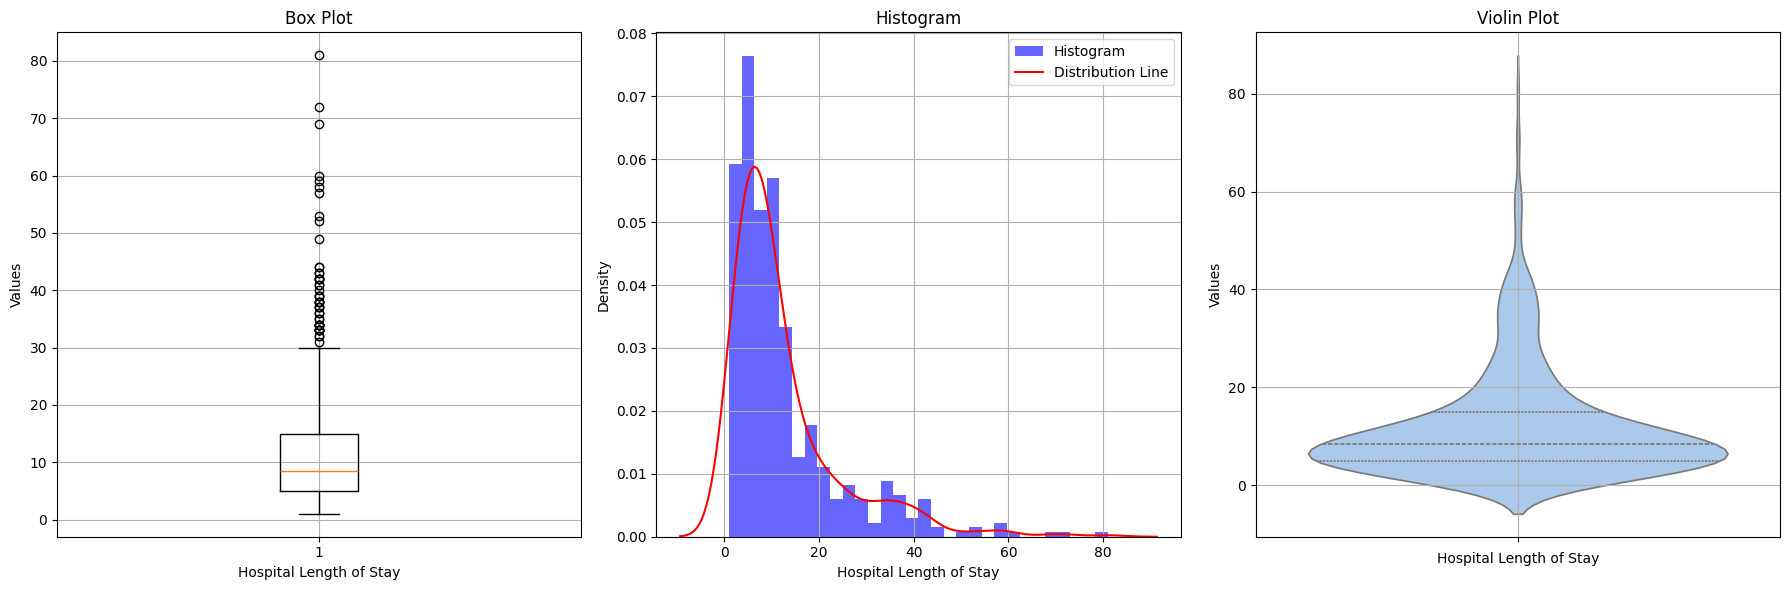

In [32]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot
axes[0].boxplot(hospital['hospital_length_of_stay'])
axes[0].set_title('Box Plot')
axes[0].set_xlabel('Hospital Length of Stay')
axes[0].set_ylabel('Values')
axes[0].grid(True)

# Histogram with KDE plot
axes[1].hist(hospital['hospital_length_of_stay'], bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
sns.kdeplot(hospital['hospital_length_of_stay'], color='red', label='Distribution Line', ax=axes[1])
axes[1].set_title('Histogram')
axes[1].set_xlabel('Hospital Length of Stay')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(True)

# Violin plot
sns.violinplot(data=hospital['hospital_length_of_stay'], inner="quartile", palette="pastel", ax=axes[2])
axes[2].set_title('Violin Plot')
axes[2].set_xlabel('Hospital Length of Stay')
axes[2].set_ylabel('Values')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [33]:
hospital.hospital_length_of_stay.value_counts().reset_index(name='Counts').sort_values(by='Counts', ascending=False)

,index,Counts
0,3,43
1,8,37
2,5,35
3,4,34
4,10,34
5,6,34
6,7,33
7,9,29
8,2,28
9,12,20


### Analysis of HOLS on the new dataset

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_22035/40910801.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=hospital_merge['hospital_length_of_stay'], inner="quartile", palette="pastel", ax=axes[2])


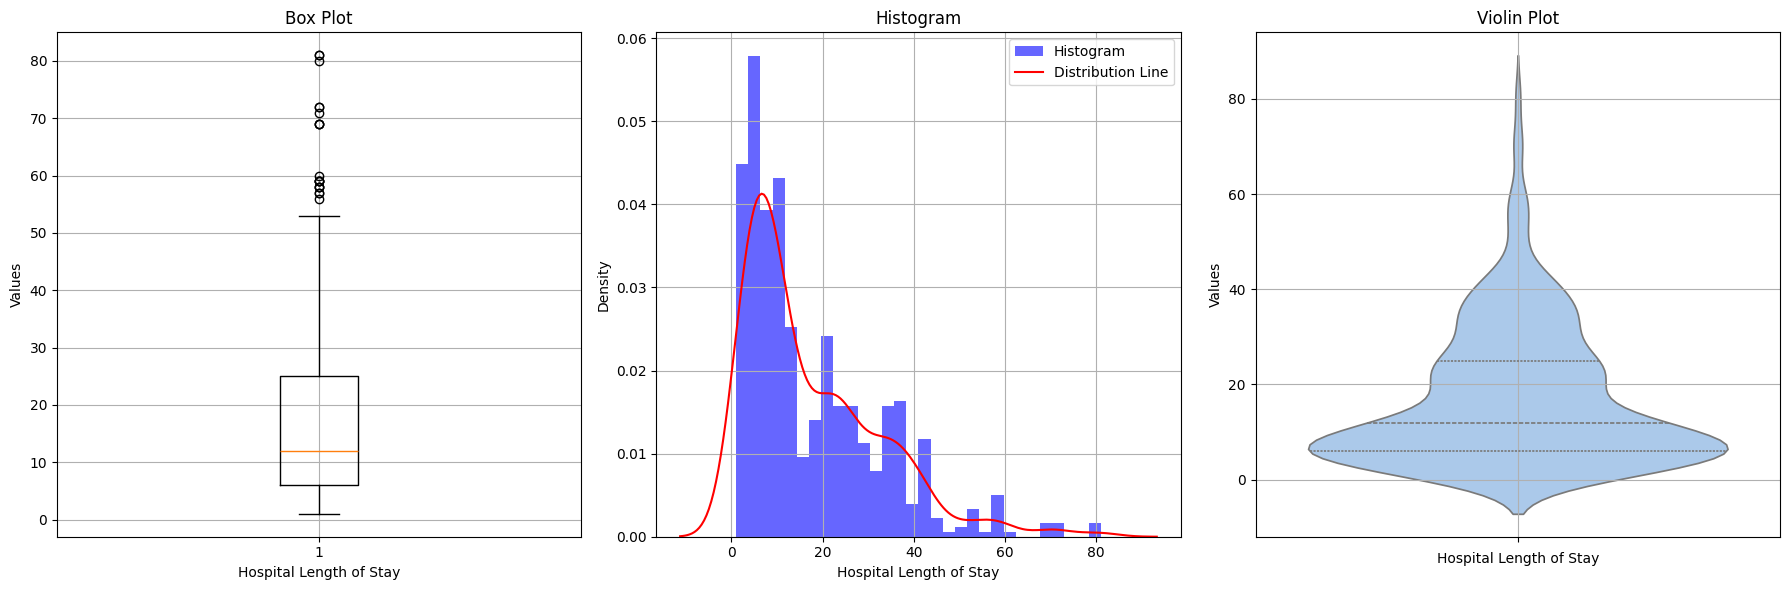

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot
axes[0].boxplot(hospital_merge['hospital_length_of_stay'])
axes[0].set_title('Box Plot')
axes[0].set_xlabel('Hospital Length of Stay')
axes[0].set_ylabel('Values')
axes[0].grid(True)

# Histogram with KDE plot
axes[1].hist(hospital_merge['hospital_length_of_stay'], bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
sns.kdeplot(hospital_merge['hospital_length_of_stay'], color='red', label='Distribution Line', ax=axes[1])
axes[1].set_title('Histogram')
axes[1].set_xlabel('Hospital Length of Stay')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(True)

# Violin plot
sns.violinplot(data=hospital_merge['hospital_length_of_stay'], inner="quartile", palette="pastel", ax=axes[2])
axes[2].set_title('Violin Plot')
axes[2].set_xlabel('Hospital Length of Stay')
axes[2].set_ylabel('Values')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
hospital_merge.hospital_length_of_stay.value_counts()

3     43
8     37
5     35
4     34
10    34
6     34
7     33
9     29
2     28
12    20
13    17
24    15
22    15
11    14
21    13
34    13
25    13
42    13
33    12
20    12
19    11
23    11
38    11
37    10
17    10
1      9
29     9
16     9
28     8
14     8
39     8
15     8
36     7
26     7
18     6
31     6
32     6
35     6
30     6
27     5
41     5
43     4
44     4
58     3
57     3
60     2
53     2
49     2
69     2
59     2
52     2
40     2
72     2
56     2
80     2
81     1
71     1
51     1
48     1
Name: hospital_length_of_stay, dtype: int64